In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import norm

## Загрузка данных

In [2]:
data = pd.read_csv('data.csv', sep = ';', index_col = 'Unnamed: 0', encoding = 'cp1251')

In [3]:
data

,PORO,SW,KRW,system_number,@NTG@,@RVAR@,@PERMX@,l_horiz,param_x,param_y,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
1,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,45,1,0,0.0441
2,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,45,3,0,0.0514
3,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,45,6,0,0.0559
4,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,0,1,0,0.1548
5,0.17,0.3,0.15,1,0.1,50,0.05,0,100,100,1,50,50,0,3,0,0.1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124412,0.17,0.3,0.15,1301,0.6,1000,2.00,2000,300,2200,20,100,100,45,10000,100,0.0754
124413,0.17,0.3,0.15,1301,0.6,1000,2.00,1000,300,1200,10,150,150,45,10000,100,0.0769
124414,0.17,0.3,0.15,1301,0.6,1000,2.00,1200,300,1400,12,150,150,45,10000,100,0.0766
124415,0.17,0.3,0.15,1301,0.6,1000,2.00,1500,300,1700,15,150,150,45,10000,100,0.0764


### Перемешиваем данные и удаляем параметры с нулевой дисперсией

In [5]:
data_sample = data.sample(frac = 1).reset_index(drop = True).drop(['param_y', 'PORO', 'SW', 'KRW'], axis = 1)
data_sample

,system_number,@NTG@,@RVAR@,@PERMX@,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
0,13,0.60,250,0.30,2000,300,20,50,50,90,3,100,0.4026
1,14,0.30,250,1.00,1000,100,10,50,50,0,6,100,0.3444
2,13,0.45,500,0.30,1000,300,20,150,150,45,3,50,0.3815
3,14,0.45,1000,2.00,2000,300,40,150,150,45,6,50,0.4186
4,14,0.60,500,2.00,1000,200,10,100,150,45,1,100,0.4444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124411,1301,0.30,250,2.00,1000,300,10,150,150,90,10000,100,0.0762
124412,13,0.30,250,1.00,1500,200,30,100,150,45,1,50,0.3266
124413,1301,0.60,250,2.00,2000,200,40,50,50,45,10000,50,0.0728
124414,1401,0.30,500,0.05,1500,300,15,100,100,90,10000,100,0.0663


### Применяем one-hot кодирование для категориальных признаков, нормализуем числовые

In [135]:
enc = OneHotEncoder()
X = data_sample[['system_number', 'rotation_angle']]
enc.fit(X)
data_cat = enc.transform(data_sample[['system_number', 'rotation_angle']]).toarray()

In [161]:
x = data_sample.drop(['system_number', 'rotation_angle', 'КИН (100)'], axis = 1).to_numpy()
min_max_scaler = MinMaxScaler()
mms = MinMaxScaler()
mms.fit(x)
data_norm = min_max_scaler.fit_transform(x)

In [8]:
data_norm.shape

(124416, 10)

In [9]:
data_cat.shape

(124416, 13)

In [10]:
target = np.reshape(data_sample['КИН (100)'].to_numpy(), (-1, 1))

In [11]:
data_nn = np.concatenate((data_cat, data_norm), axis=1)

In [12]:
data_nn.shape

(124416, 23)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_nn, target, test_size = 0.2, random_state = 42)

In [52]:
pd.DataFrame(data_nn)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.210526,0.128205,1.00,1.0,0.487179,0.0,0.0,0.0002,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.210526,0.487179,0.50,0.0,0.230769,0.0,0.0,0.0005,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.473684,0.128205,0.50,1.0,0.487179,1.0,0.4,0.0002,0.5
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.7,1.000000,1.000000,1.00,1.0,1.000000,1.0,0.4,0.0005,0.5
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.473684,1.000000,0.50,0.5,0.230769,0.5,0.4,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.4,0.210526,1.000000,0.50,1.0,0.230769,1.0,0.4,1.0000,1.0
124412,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.210526,0.487179,0.75,0.5,0.743590,0.5,0.4,0.0000,0.5
124413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.210526,1.000000,1.00,0.5,1.000000,0.0,0.0,1.0000,0.5
124414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.4,0.473684,0.000000,0.75,1.0,0.358974,0.5,0.2,1.0000,1.0


In [53]:
pd.DataFrame(data_norm)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.210526,0.128205,1.00,1.0,0.487179,0.0,0.0,0.0002,1.0
1,0.4,0.210526,0.487179,0.50,0.0,0.230769,0.0,0.0,0.0005,1.0
2,0.7,0.473684,0.128205,0.50,1.0,0.487179,1.0,0.4,0.0002,0.5
3,0.7,1.000000,1.000000,1.00,1.0,1.000000,1.0,0.4,0.0005,0.5
4,1.0,0.473684,1.000000,0.50,0.5,0.230769,0.5,0.4,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...
124411,0.4,0.210526,1.000000,0.50,1.0,0.230769,1.0,0.4,1.0000,1.0
124412,0.4,0.210526,0.487179,0.75,0.5,0.743590,0.5,0.4,0.0000,0.5
124413,1.0,0.210526,1.000000,1.00,0.5,1.000000,0.0,0.0,1.0000,0.5
124414,0.4,0.473684,0.000000,0.75,1.0,0.358974,0.5,0.2,1.0000,1.0


### Многослойный перцептрон

In [223]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [42]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [43]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim = 23, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=[coeff_determination])


In [44]:
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)#, verbose=0)

Epoch 1/100
3111/3111 [==============================] - 2s 716us/step - loss: 0.0092 - coeff_determination: 0.5155 - val_loss: 0.0040 - val_coeff_determination: 0.7898
Epoch 2/100
3111/3111 [==============================] - 2s 754us/step - loss: 0.0034 - coeff_determination: 0.8218 - val_loss: 0.0029 - val_coeff_determination: 0.8475
Epoch 3/100
3111/3111 [==============================] - 2s 680us/step - loss: 0.0023 - coeff_determination: 0.8808 - val_loss: 0.0019 - val_coeff_determination: 0.8982
Epoch 4/100
3111/3111 [==============================] - 2s 653us/step - loss: 0.0019 - coeff_determination: 0.9008 - val_loss: 0.0018 - val_coeff_determination: 0.9054
Epoch 5/100
3111/3111 [==============================] - 2s 658us/step - loss: 0.0018 - coeff_determination: 0.9060 - val_loss: 0.0017 - val_coeff_determination: 0.9084
Epoch 6/100
3111/3111 [==============================] - 2s 652us/step - loss: 0.0017 - coeff_determination: 0.9076 - val_loss: 0.0016 - val_coeff_determin

In [45]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
#print('Train: %.3f, Test: %.3f (train_mse, test_mse))
print(train_mse, test_mse)

[0.0008912937482818961, 0.952128529548645] [0.0009133156854659319, 0.9511963725090027]


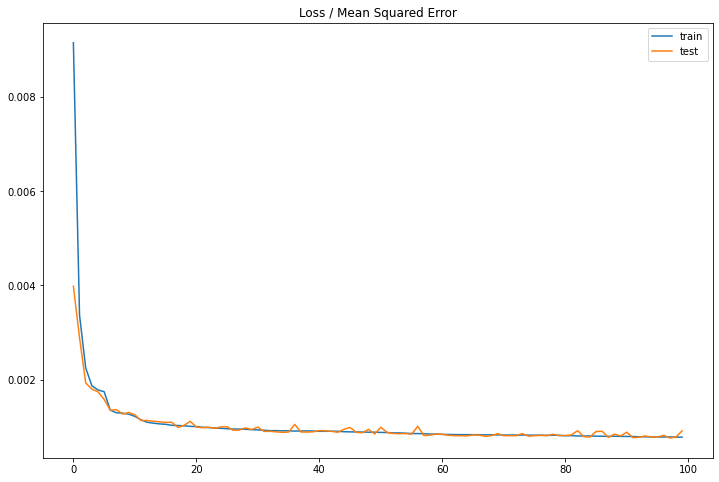

In [46]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.plot(history.history['coeff_determination'], label='R2', secondary_y = True)
plt.legend()
plt.show()

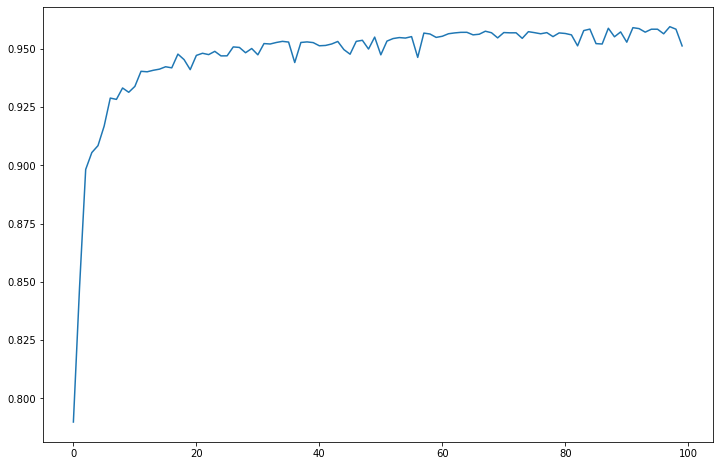

In [47]:
plt.plot(history.history['val_coeff_determination'], label='R2')

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                288       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [54]:
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim = 23, activation = 'sigmoid'))
model1.add(Dense(1, activation = 'linear'))
#opt = SGD(lr = 0.01, momentum = 0.9)
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=[coeff_determination])


In [55]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)#, verbose=0)

Epoch 1/100
3111/3111 [==============================] - 2s 711us/step - loss: 0.0068 - coeff_determination: 0.6414 - val_loss: 0.0057 - val_coeff_determination: 0.7028
Epoch 2/100
3111/3111 [==============================] - 2s 655us/step - loss: 0.0053 - coeff_determination: 0.7171 - val_loss: 0.0048 - val_coeff_determination: 0.7461
Epoch 3/100
3111/3111 [==============================] - 2s 668us/step - loss: 0.0043 - coeff_determination: 0.7751 - val_loss: 0.0036 - val_coeff_determination: 0.8066
Epoch 4/100
3111/3111 [==============================] - 2s 655us/step - loss: 0.0032 - coeff_determination: 0.8314 - val_loss: 0.0027 - val_coeff_determination: 0.8590
Epoch 5/100
3111/3111 [==============================] - 2s 747us/step - loss: 0.0023 - coeff_determination: 0.8768 - val_loss: 0.0020 - val_coeff_determination: 0.8924
Epoch 6/100
3111/3111 [==============================] - 2s 724us/step - loss: 0.0019 - coeff_determination: 0.8995 - val_loss: 0.0019 - val_coeff_determin

In [56]:
train_mse = model1.evaluate(X_train, y_train, verbose=0)
test_mse = model1.evaluate(X_test, y_test, verbose=0)
#print('Train: %.3f, Test: %.3f (train_mse, test_mse))
print(train_mse, test_mse)

[0.00081300875172019, 0.9567164778709412] [0.000827261945232749, 0.9561268091201782]


In [227]:
# define the keras model
model2 = Sequential()
model2.add(Dense(20, input_dim = 23, activation = 'sigmoid'))
model2.add(Dense(20, input_dim = 20, activation = 'sigmoid'))
model2.add(Dense(1, activation = 'linear'))
model2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=[coeff_determination])

In [228]:
callback = EarlyStopping(monitor='loss', patience = 5)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[callback])#, verbose=0)

Epoch 1/200
3111/3111 [==============================] - 2s 782us/step - loss: 0.0174 - coeff_determination: 0.1072 - val_loss: 0.0053 - val_coeff_determination: 0.7220
Epoch 2/200
3111/3111 [==============================] - 2s 745us/step - loss: 0.0049 - coeff_determination: 0.7400 - val_loss: 0.0045 - val_coeff_determination: 0.7631
Epoch 3/200
3111/3111 [==============================] - 2s 763us/step - loss: 0.0040 - coeff_determination: 0.7852 - val_loss: 0.0032 - val_coeff_determination: 0.8306
Epoch 4/200
3111/3111 [==============================] - 2s 778us/step - loss: 0.0026 - coeff_determination: 0.8612 - val_loss: 0.0021 - val_coeff_determination: 0.8911
Epoch 5/200
3111/3111 [==============================] - 3s 882us/step - loss: 0.0018 - coeff_determination: 0.9014 - val_loss: 0.0018 - val_coeff_determination: 0.9063
Epoch 6/200
3111/3111 [==============================] - 2s 759us/step - loss: 0.0015 - coeff_determination: 0.9197 - val_loss: 0.0013 - val_coeff_determin

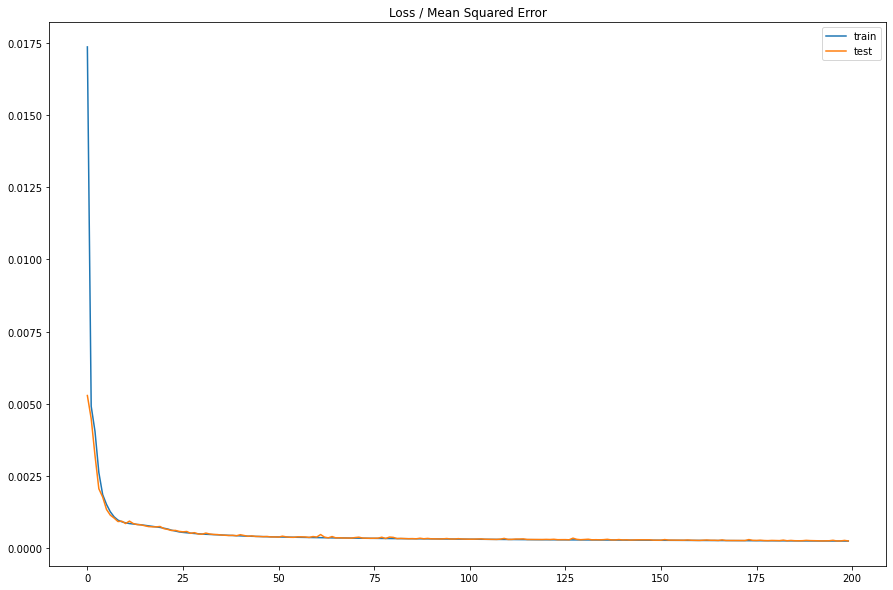

In [230]:
plt.title('Loss / Mean Squared Error')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
#plt.plot(history.history['coeff_determination'], label='R2', secondary_y = True)
plt.legend()
plt.show()

In [231]:
model3 = Sequential()
model3.add(Dense(20, input_dim = 23, activation = 'relu'))
model3.add(Dense(20, input_dim = 20, activation = 'relu'))
model3.add(Dense(20, input_dim = 20, activation = 'relu'))
model3.add(Dense(1, activation = 'linear'))
model3.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=[coeff_determination])

In [232]:
callback = EarlyStopping(monitor='loss', patience = 5)
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[callback])#, verbose=0)

Epoch 1/200
3111/3111 [==============================] - 3s 829us/step - loss: 0.0025 - coeff_determination: 0.8694 - val_loss: 9.1774e-04 - val_coeff_determination: 0.9511
Epoch 2/200
3111/3111 [==============================] - 3s 920us/step - loss: 6.5012e-04 - coeff_determination: 0.9650 - val_loss: 6.5569e-04 - val_coeff_determination: 0.9649
Epoch 3/200
3111/3111 [==============================] - 3s 816us/step - loss: 5.3103e-04 - coeff_determination: 0.9715 - val_loss: 4.5391e-04 - val_coeff_determination: 0.9756
Epoch 4/200
3111/3111 [==============================] - 2s 787us/step - loss: 4.6477e-04 - coeff_determination: 0.9750 - val_loss: 4.6014e-04 - val_coeff_determination: 0.9754
Epoch 5/200
3111/3111 [==============================] - 3s 804us/step - loss: 4.2543e-04 - coeff_determination: 0.9770 - val_loss: 4.3315e-04 - val_coeff_determination: 0.9768
Epoch 6/200
3111/3111 [==============================] - 2s 797us/step - loss: 4.0497e-04 - coeff_determination: 0.9783

In [217]:
from keras.utils.vis_utils import plot_model

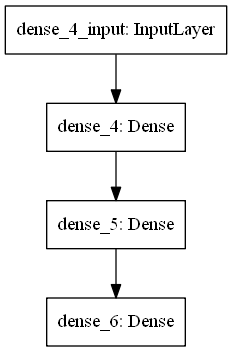

In [220]:
import pydot
plot_model(model2)

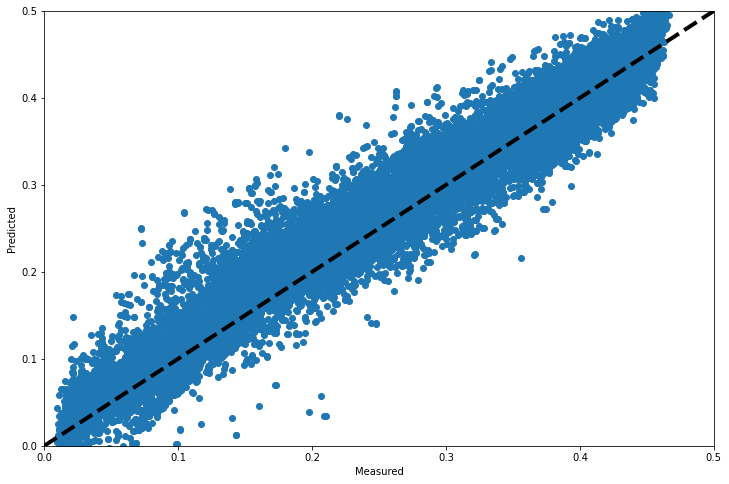

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_test, model.predict(X_test))
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=4)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

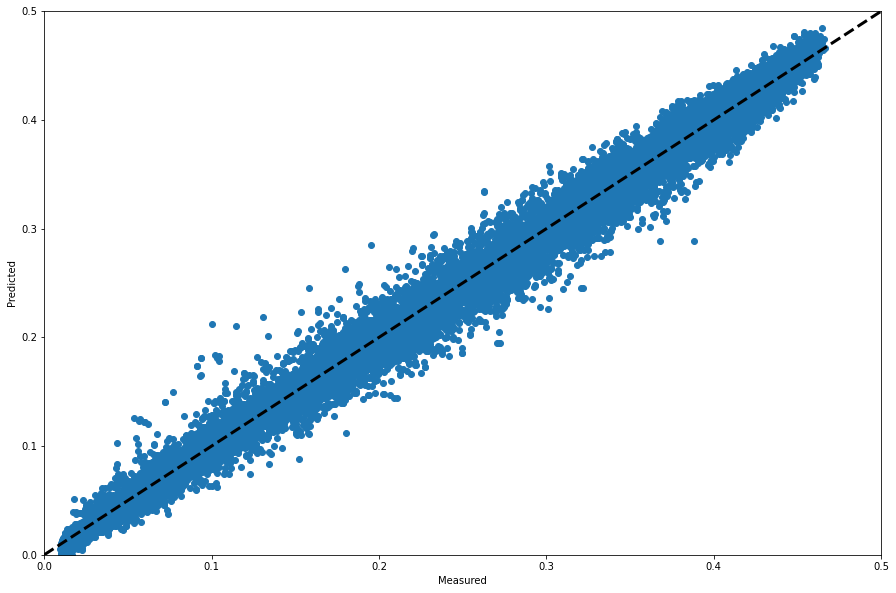

In [233]:
fig, ax = plt.subplots()
ax.scatter(y_test, model3.predict(X_test))
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=3)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

### Метод опорных векторов

In [15]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train.ravel())

SVR()

In [16]:
regressor.score(X_test, y_test.ravel())

0.8799717214800279

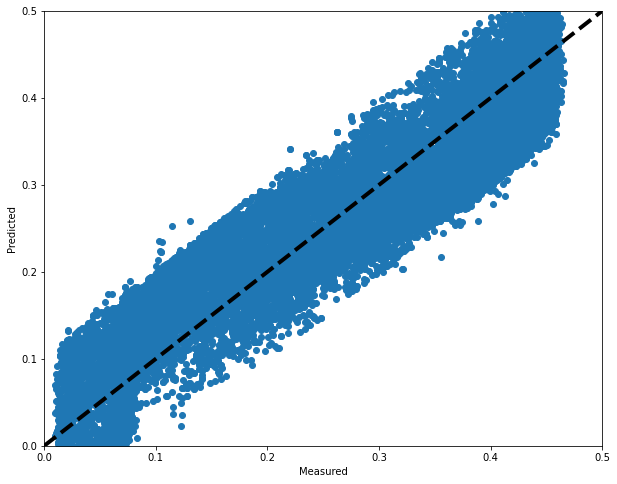

In [23]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10, 8)

ax.scatter(y_test, regressor.predict(X_test))
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=4)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

In [84]:
regressor1 = SVR()
regressor1.fit(X_train_lin, y_train_lin.ravel())

SVR()

In [86]:
regressor1.score(X_test_lin, y_test_lin.ravel())

0.881118134122879

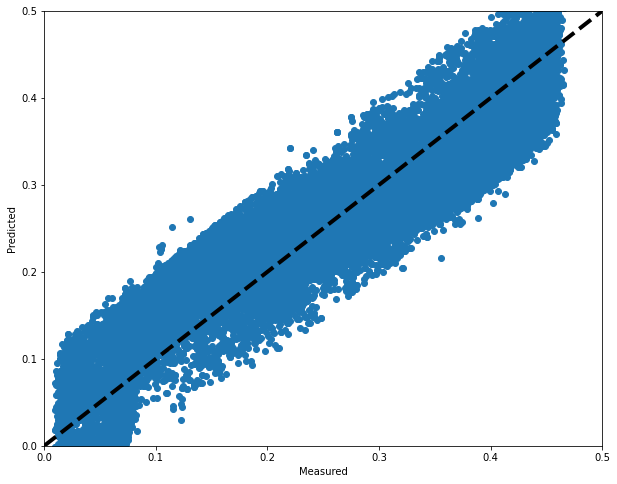

In [88]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10, 8)

ax.scatter(y_test, regressor1.predict(X_test_lin))
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=4)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

### Метод ближайших соседей

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [26]:
knn_model.score(X_test, y_test)

0.8867989790034005

In [91]:
knn_model1 = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_model1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [92]:
knn_model1.score(X_test, y_test)

0.9920191044066629

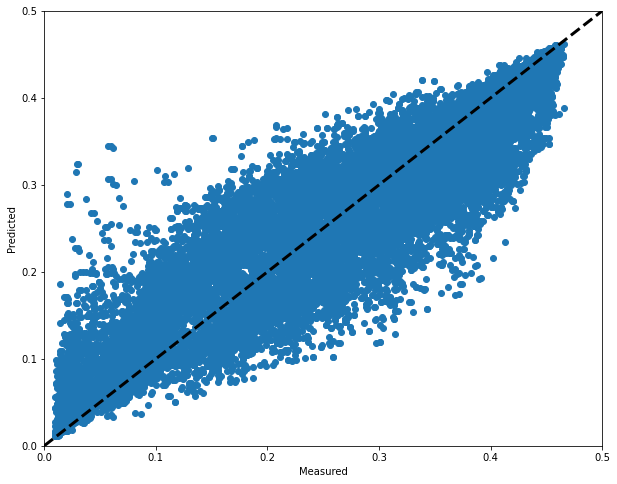

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_test, knn_model.predict(X_test))
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

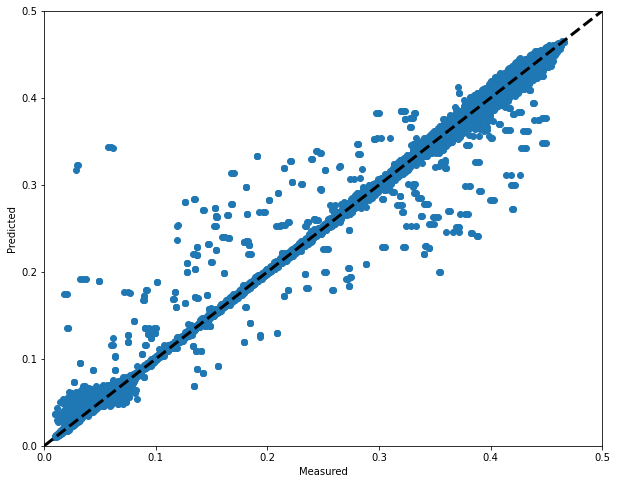

In [93]:
fig, ax = plt.subplots()
ax.scatter(y_test, knn_model1.predict(X_test))
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

In [94]:
knn_model1 = KNeighborsRegressor(weights='distance')
pipe = Pipeline(steps=[("knn", knn_model1)])


param_grid = {
    "knn__n_neighbors": [5, 10, 15, 20]}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.982):
{'knn__n_neighbors': 20}


In [95]:
knn_model2 = KNeighborsRegressor(n_neighbors=20, weights='distance')
knn_model2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [96]:
knn_model2.score(X_test, y_test)

0.9930714408396087

### Случайный лес

In [238]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=10)

In [239]:
rf_model.score(X_test, y_test.ravel())

0.9990005729647332

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


rf1 = RandomForestRegressor()

scaler = StandardScaler()


pipe = Pipeline(steps=[("rf1", rf1)])


param_grid = {
    "rf1__n_estimators": [100, 200, 300, 400]}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)






NameError: name 'RandomForestRegressor' is not defined

In [89]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500)

In [37]:
rf.score(X_test, y_test.ravel())

0.9993098869887934

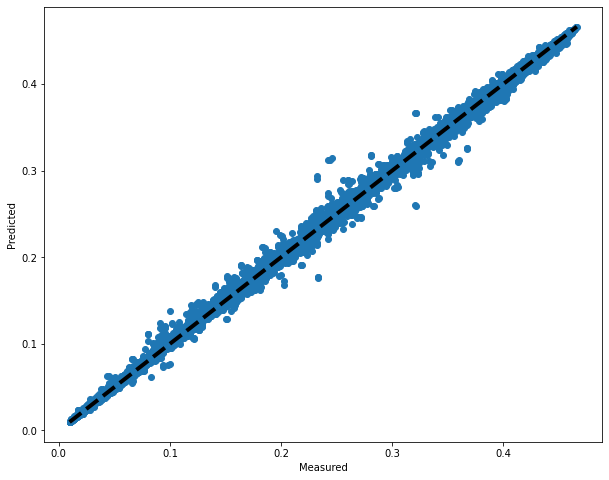

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_test, rf.predict(X_test))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Градиентный бустинг

In [97]:
import warnings
warnings.filterwarnings("ignore")
from catboost import CatBoostRegressor
from catboost import Pool

In [98]:
data_cb = data.sample(frac=1).reset_index(drop=True).drop(['param_y', 'PORO', 'SW', 'KRW'], axis = 1).rename(columns={
    '@NTG@': 'NTG',
    '@RVAR@': 'RVAR',
    '@PERMX@': 'PERMX'})
y = data_cb['КИН (100)']
X = data_cb.drop('КИН (100)', axis = 1)

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X, y, test_size = 0.2, shuffle = False)


In [100]:
cf = ['system_number', 'rotation_angle']
train_pool = Pool(X_train_cb, y_train_cb, cat_features = cf)

In [107]:
CAT = CatBoostRegressor(
                        task_type = 'GPU',
                        iterations = 3000, 
                        depth= 6,
                        early_stopping_rounds= 20,
                        
                        loss_function = "RMSE",
                        verbose = True).fit(train_pool)#custom_metric = 'R2',

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.0383
0:	learn: 0.1363991	total: 23.5ms	remaining: 1m 10s
1:	learn: 0.1322324	total: 45.6ms	remaining: 1m 8s
2:	learn: 0.1282578	total: 67.3ms	remaining: 1m 7s
3:	learn: 0.1244000	total: 88.9ms	remaining: 1m 6s
4:	learn: 0.1207687	total: 110ms	remaining: 1m 6s
5:	learn: 0.1172430	total: 131ms	remaining: 1m 5s
6:	learn: 0.1138907	total: 154ms	remaining: 1m 5s
7:	learn: 0.1106995	total: 177ms	remaining: 1m 6s
8:	learn: 0.1076419	total: 199ms	remaining: 1m 6s
9:	learn: 0.1046651	total: 226ms	remaining: 1m 7s
10:	learn: 0.1018430	total: 249ms	remaining: 1m 7s
11:	learn: 0.0991573	total: 273ms	remaining: 1m 8s
12:	learn: 0.0965496	total: 296ms	remaining: 1m 7s
13:	learn: 0.0940366	total: 317ms	remaining: 1m 7s
14:	learn: 0.0916339	total: 338ms	remaining: 1m 7s
15:	learn: 0.0892989	total: 360ms	remaining: 1m 7s
16:	learn: 0.0871002	total: 382ms	remaining: 1m 7s
17:	learn: 0.0849617	total: 403ms	remaining: 1m 6s
18:	learn: 0.0829276	total: 426ms	remaining: 1m 6s
19:	lear

In [109]:
CAT.score(X_test_cb, y_test_cb)

0.9907588434073107

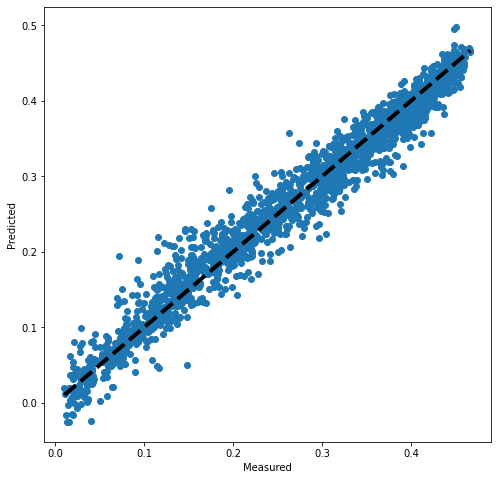

In [93]:
fig, ax = plt.subplots()
ax.scatter(y_test, CAT.predict(X_test))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [240]:
train_pool2 = Pool(X_train, y_train)
CAT2 = CatBoostRegressor(
                        task_type = 'GPU',
                        iterations = 3000, 
                        depth= 6,
                        early_stopping_rounds= 20,
                        
                        loss_function = "RMSE",
                        verbose = True).fit(train_pool2)#custom_metric = 'R2',

Learning rate set to 0.0383
0:	learn: 0.1363342	total: 25.4ms	remaining: 1m 16s
1:	learn: 0.1321688	total: 32.9ms	remaining: 49.4s
2:	learn: 0.1281953	total: 39.6ms	remaining: 39.5s
3:	learn: 0.1243458	total: 45.7ms	remaining: 34.2s
4:	learn: 0.1207154	total: 51.9ms	remaining: 31.1s
5:	learn: 0.1171977	total: 58.5ms	remaining: 29.2s
6:	learn: 0.1138801	total: 64.8ms	remaining: 27.7s
7:	learn: 0.1106654	total: 71.8ms	remaining: 26.8s
8:	learn: 0.1076378	total: 78.8ms	remaining: 26.2s
9:	learn: 0.1047413	total: 85.8ms	remaining: 25.7s
10:	learn: 0.1019266	total: 91.5ms	remaining: 24.9s
11:	learn: 0.0992648	total: 97.4ms	remaining: 24.3s
12:	learn: 0.0966740	total: 104ms	remaining: 23.8s
13:	learn: 0.0942128	total: 110ms	remaining: 23.4s
14:	learn: 0.0918279	total: 117ms	remaining: 23.3s
15:	learn: 0.0895640	total: 124ms	remaining: 23.2s
16:	learn: 0.0873886	total: 131ms	remaining: 23s
17:	learn: 0.0852959	total: 137ms	remaining: 22.8s
18:	learn: 0.0832831	total: 144ms	remaining: 22.6s
19

In [244]:
CAT2.score(X_test, y_test)

-49405.348728536526

In [248]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
r2_score(y_test, CAT2.predict(X_test))

0.992455181738278

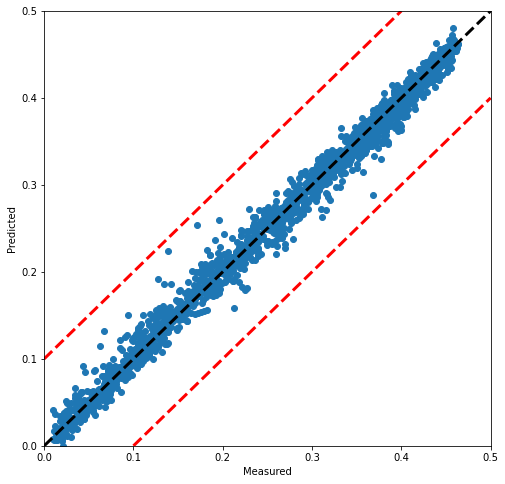

In [275]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8, 8)

ax.plot(y_test, CAT2.predict(X_test),  "o", markevery=10)
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=3)
ax.plot([0.1, 0.5], [0, 0.4], 'r--', lw=3)
ax.plot([0.0, 0.4], [0.1, 0.5], 'r--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

### Линейная регрессия

In [75]:
enc = OneHotEncoder(drop='first')
X = data_sample[['system_number', 'rotation_angle']]
enc.fit(X)
data_cat = enc.transform(data_sample[['system_number', 'rotation_angle']]).toarray()

data_lin = np.concatenate((data_cat, data_norm), axis=1)
data_lin.shape

(124416, 21)

In [76]:
from sklearn.model_selection import train_test_split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(data_lin, target, test_size = 0.2, random_state = 42)

In [279]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train_lin, y_train_lin)
linear.score(X_test_lin, y_test_lin)

0.7154672041087615

In [280]:
linear.coef_

array([[ 0.01704498, -0.08658395,  0.03200925, -0.00553829,  4.92820688,
         4.92707092,  4.97515491,  4.97833676,  4.97556995, -0.01291837,
        -0.0103732 ,  0.11796655,  0.08606449,  0.10618975, -0.07789821,
        -0.0484141 ,  0.01032795,  0.00884291,  0.01624973, -5.18506433,
         0.01587227]])

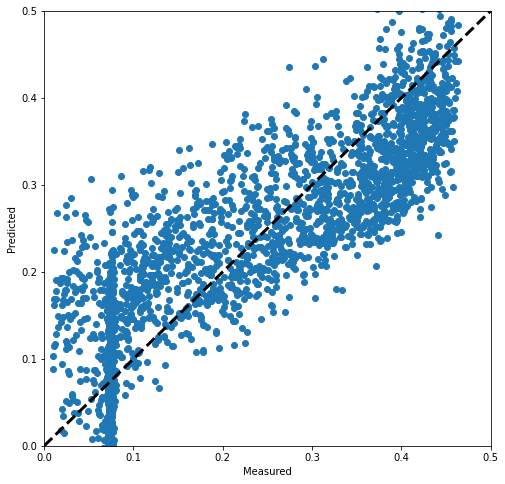

In [281]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8, 8)

#ax.scatter(y_test, ridge.predict(X_test))
ax.plot(y_test_lin, LIN_pred,  "o", markevery=10)
ax.plot([0, 0.5], [0, 0.5], 'k--', lw=3)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_ylim(bottom = 0, top = 0.5)
ax.set_xlim(left = 0, right = 0.5)
plt.show()

In [250]:
SVM_pred = regressor1.predict(X_test_lin) #'R2': 0.859   0.881
MLP_pred = model3.predict(X_test) #              0.944   0.993
CAT_pred = CAT2.predict(X_test) #                0.981   0.990
RF_pred = rf.predict(X_test) #                   0.982   0.999
KNN_pred = knn_model2.predict(X_test) #          0.840   0.993
LIN_pred = linear.predict(X_test_lin)#           0.710   0.715

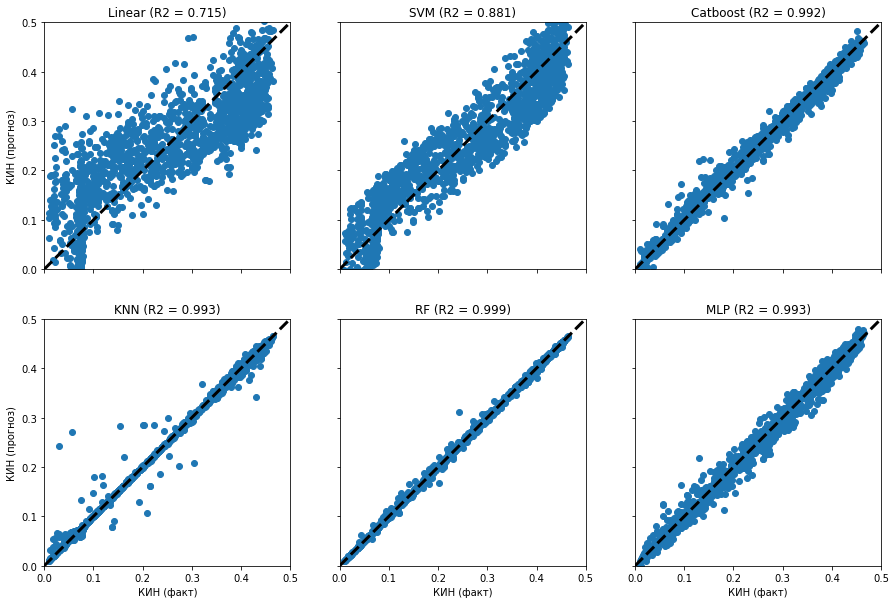

In [256]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
mark_ev = 15

fig, axs = plt.subplots(2, 3)
axs[0, 1].plot(y_test_lin, SVM_pred, "o", markevery = mark_ev)
axs[0, 1].plot([0, 0.5], [0, 0.5], 'k--', lw=3)
axs[0, 1].set_title('SVM (R2 = 0.881)')
axs[0, 1].set_ylim(bottom = 0, top = 0.5)
axs[0, 1].set_xlim(left = 0, right = 0.5)
###
axs[1, 2].plot(y_test, MLP_pred, "o", markevery = mark_ev)
axs[1, 2].plot([0, 0.5], [0, 0.5], 'k--', lw=3)
axs[1, 2].set_title('MLP (R2 = 0.993)')
axs[1, 2].set_ylim(bottom = 0, top = 0.5)
axs[1, 2].set_xlim(left = 0, right = 0.5)
###
axs[0, 2].plot(y_test, CAT_pred, "o", markevery = mark_ev)
axs[0, 2].plot([0, 0.5], [0, 0.5], 'k--', lw=3)
axs[0, 2].set_title('Catboost (R2 = 0.992)')
axs[0, 2].set_ylim(bottom = 0, top = 0.5)
axs[0, 2].set_xlim(left = 0, right = 0.5)
###
axs[1, 1].plot(y_test, RF_pred, "o", markevery = mark_ev)
axs[1, 1].plot([0, 0.5], [0, 0.5], 'k--', lw=3)
axs[1, 1].set_title('RF (R2 = 0.999)')
axs[1, 1].set_ylim(bottom = 0, top = 0.5)
axs[1, 1].set_xlim(left = 0, right = 0.5)
###
axs[1, 0].plot(y_test, KNN_pred, "o", markevery = mark_ev)
axs[1, 0].plot([0, 0.5], [0, 0.5], 'k--', lw=3)
axs[1, 0].set_title('KNN (R2 = 0.993)')
axs[1, 0].set_ylim(bottom = 0, top = 0.5)
axs[1, 0].set_xlim(left = 0, right = 0.5)
###
axs[0, 0].plot(y_test_lin, LIN_pred,  "o", markevery = mark_ev)
axs[0, 0].plot([0, 0.5], [0, 0.5], 'k--', lw=3)
axs[0, 0].set_title('Linear (R2 = 0.715)')
axs[0, 0].set_ylim(bottom = 0, top = 0.5)
axs[0, 0].set_xlim(left = 0, right = 0.5)
###

for ax in axs.flat:
    ax.set(xlabel='КИН (факт)', ylabel='КИН (прогноз)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [205]:
data_vstr = pd.read_csv('data_vstr.csv', sep = ';', index_col = 'Unnamed: 0', encoding = 'UTF-8')
data_vstr = data_vstr.reset_index(drop=True).drop(['PORO', 'SW', 'KRW'], axis = 1).rename(columns={
    '@NTG@': 'NTG',
    '@RVAR@': 'RVAR',
    '@PERMX@': 'PERMX'})
data_vstr

,system_number,NTG,RVAR,PERMX,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
0,13,0.3,300,0.04,500,100,10,100,100,0,6,100,0.404


In [206]:
data_vstr_cat = enc.transform(data_vstr[['system_number', 'rotation_angle']]).toarray()

x = data_vstr.drop(['system_number', 'rotation_angle', 'КИН (100)'], axis = 1).to_numpy()
data_vstr_norm = mms.transform(x)

data_vstr_pred = np.concatenate((data_vstr_cat, data_vstr_norm), axis=1)

In [207]:
data_vstr_pred

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e-01,  2.63157895e-01,
        -5.12820513e-03,  2.50000000e-01,  0.00000000e+00,
         2.30769231e-01,  5.00000000e-01,  2.00000000e-01,
         5.00050005e-04,  1.00000000e+00]])

In [236]:
RF_pred = rf.predict(data_vstr_pred) 
MLP_pred = model3.predict(data_vstr_pred)

In [237]:
RF_pred, MLP_pred

(array([0.4090588]), array([[0.35376263]], dtype=float32))

In [213]:
importances = rf.feature_importances_
importances.shape

(23,)

<BarContainer object of 23 artists>

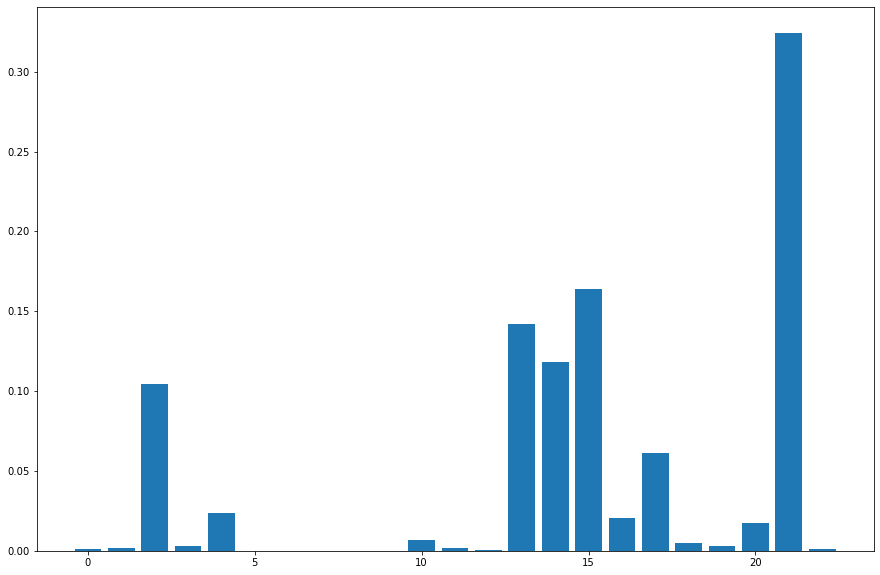

In [260]:
plt.bar(np.arange(23), importances)

In [ ]:
from sklearn.compose import ColumnTransformerdata_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_vars),
    ('categorical', OneHotEncoder(), cat_vars),
    
])airbnb_processed = data_pipeline.fit_transform(airbnb_data)

In [ ]:
#Categorical variables to use
cat_vars = ["instant_bookable", "is_business_travel_ready", "cancellation_policy","host_is_superhost", "neighbourhood_cleansed","property_type","room_type", "bed_type"]

# Numerical Variables to use
num_vars = ['price', 'square_feet','minimum_nights','weekly_price', 'monthly_price', 'security_deposit','bathrooms', 'bedrooms', 'beds', "guests_included",
       'cleaning_fee', "reviews_per_month","host_listings_count",

In [1]:
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
tree_reg = tree_reg.fit(X_train, y_train)
tree_reg.score(X_test, y_test)

NameError: name 'X_train' is not defined